In [142]:
import pandas as pd
import numpy as np

In [143]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [144]:
type(df)

pandas.core.frame.DataFrame

In [145]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [146]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [147]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [148]:
df.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
368,Prof,A,35,30,Male,131950


In [149]:
df.sample(6)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
226,AsstProf,A,3,1,Male,63900
384,Prof,A,27,21,Male,125192
331,Prof,B,20,9,Male,116518
311,Prof,A,14,9,Male,108100
321,AssocProf,B,9,9,Male,95642
26,Prof,A,35,23,Male,134885


In [150]:
type(df.columns)

pandas.core.indexes.base.Index

In [151]:
list(df.columns)

['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']

In [152]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [153]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [154]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

df['rank']=label_encoder.fit_transform(df['rank'])
df['discipline']= label_encoder.fit_transform(df['discipline'])
df['sex']=label_encoder.fit_transform(df['sex'])
print(df.head())

   rank  discipline  yrs.since.phd  yrs.service  sex  salary
0     2           1             19           18    1  139750
1     2           1             20           16    1  173200
2     1           1              4            3    1   79750
3     2           1             45           39    1  115000
4     2           1             40           41    1  141500


In [155]:
df.sample(8)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
362,2,0,30,30,1,138771
379,0,0,11,8,1,104121
367,0,0,10,1,1,108413
361,2,0,23,15,0,109646
25,2,0,21,8,1,106294
349,2,1,27,28,1,144309
58,0,1,10,9,1,100135
230,2,0,29,27,0,91000


# EDA

In [156]:
import seaborn as sns

<AxesSubplot:xlabel='rank', ylabel='salary'>

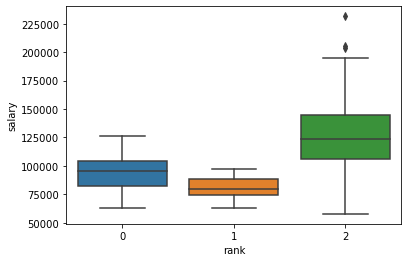

In [157]:
sns.boxplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

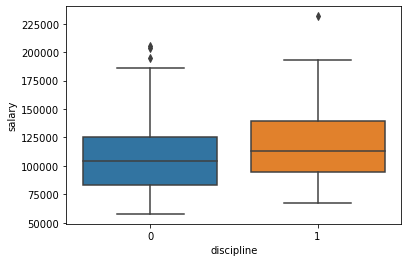

In [158]:
sns.boxplot(x='discipline',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

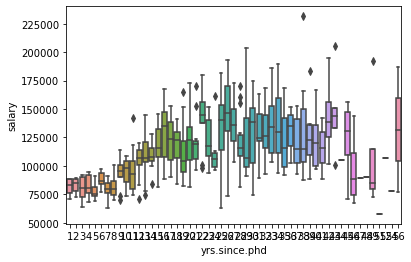

In [159]:
sns.boxplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

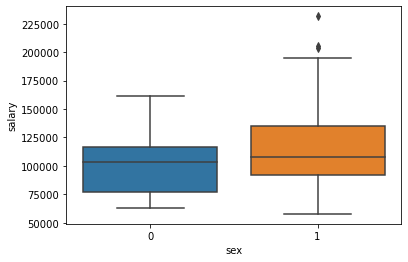

In [160]:
sns.boxplot(x='sex',y='salary',data=df)

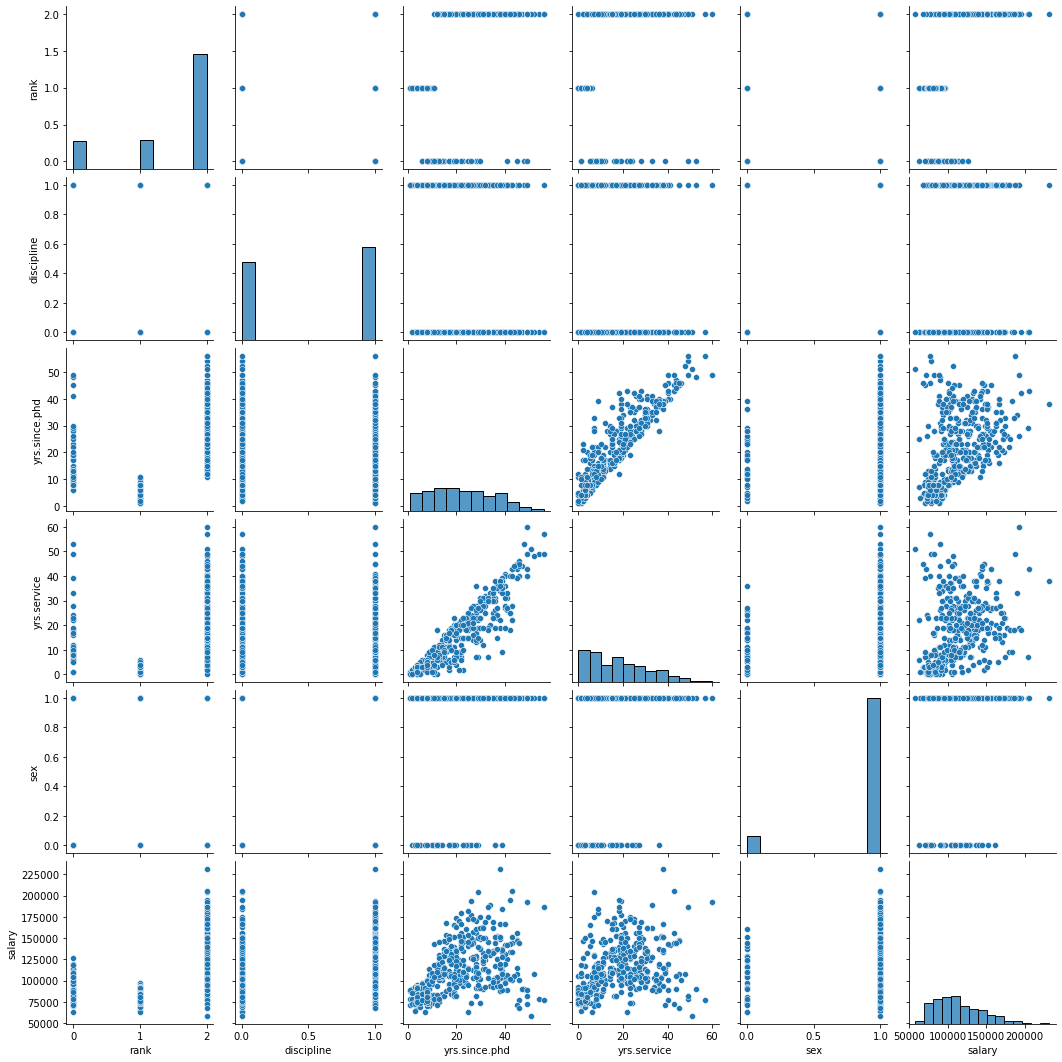

In [161]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

# Correlation:

In [162]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [163]:
type(df.corr())

pandas.core.frame.DataFrame

In [164]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

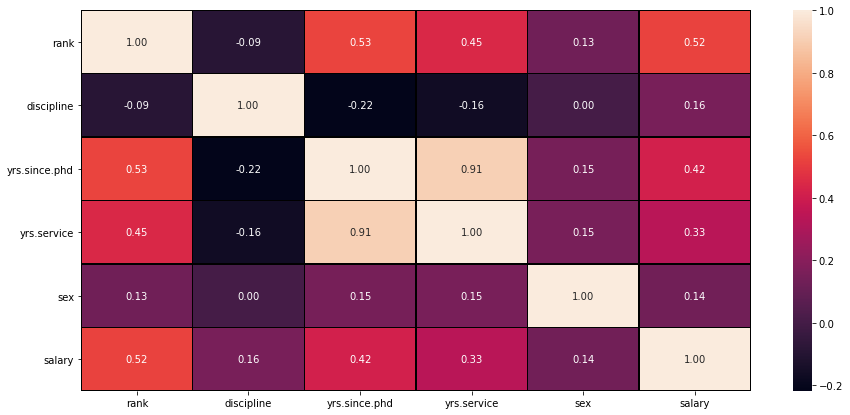

In [165]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

# Outcome of Corerelation:

All  columns are positively correlated with target column
    
    1. Rank has 52%  positive correlation with the target column,which can be considered good bond.
    2. Discipline has 16% positive correlation with target column,which can be considered weak bond.
    3. Yrs since Phd has 42 % correlation with the target column, which can be considered as a good bond.
    4. Yrs of Service has 33 % correlation with the target column which can be considered as a good bond.
    5. Sex has 14% correlation with teh target column which can be considered as a weak bond.
    

# Descriptive Statistics

In [166]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


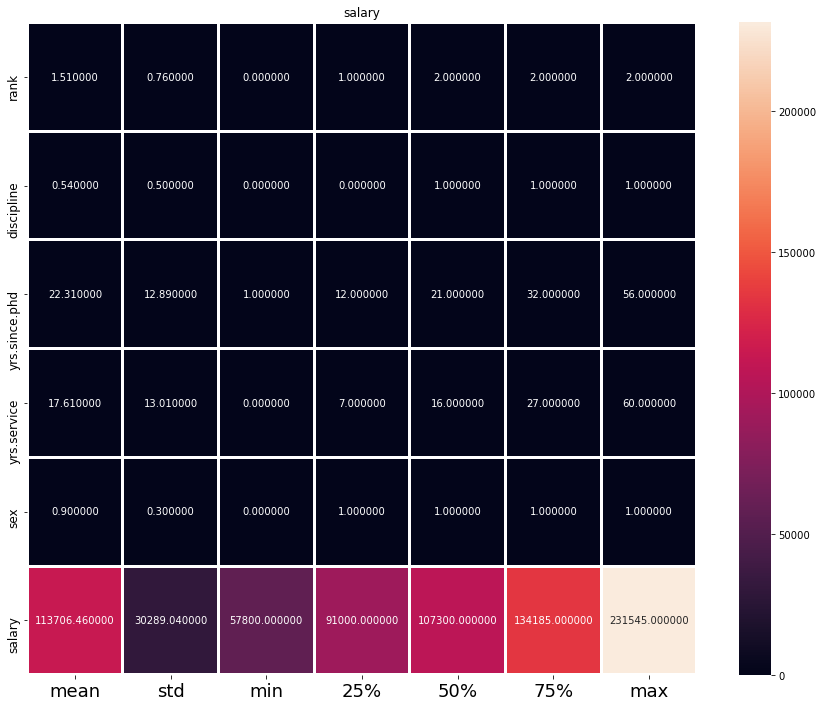

In [167]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('salary')
plt.savefig('heatmap.png')
plt.show()


In [168]:
Outcome of describing of datasets:

From the above plotting we are determining mean,standard deviation, minimum and maximum value of each column . It helps us further in data cleaning.

Total number of rows & columns in the datasets:
Rows:397 Columns:6
Rank:
    
Mean =1.51
std=0.76
Max=2.00 
Min=0.00 

discipline: 
Mean =0.54
std=0.50
Max=1.00 
Min=0.00

Yr.since Phd: 
Mean =22.31
std=12.89 
Max=56.00
Min=1.00

Yrs. of service: 
Mean=17.61
std=13.01
Max=60.00
Min=0.00 

Sex:
Mean =0.90
std=0.3
Max=1.00
Min=0.00 

SyntaxError: invalid syntax (<ipython-input-168-cb3b55310b9e>, line 1)

In [ ]:
df.info()

# Outliers Checking:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.shape

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,3),color='green',figsize=(10,10))

From the above outcome we can see that columns [yrs of service,& sex] has outliers and rest other columns has no outliers

# Skewness:

In [ ]:
df.skew()

Outcome of the skewness: Skewness threshold is taken is +/-0.65 columns which are having skewness:

Rank -1.151164 , discipline -0.177684 Yrs,since phd 0.300880 yrs.Service 0.650569 sex -2.709958

# Normal Distribution Curve:

In [ ]:
sns.distplot(df['rank'])

In [ ]:
sns.distplot(df['discipline'])

In [ ]:
sns.distplot(df['yrs.since.phd'])

In [ ]:
sns.distplot(df['yrs.service'])

In [ ]:
sns.distplot(df['sex'])

All the above datas are not normalised. The building blocks are out of the normalised curve

In [ ]:
df.corr()['salary']

In [ ]:
delete=pd.DataFrame([['0.138610','sex','No','Alot']],columns=['Correlation with target','Column Name','Normalised','Outliers'])
delete

In [ ]:
df=df.drop(['sex'],axis=1)
df

# Z-score Techniques:

In [ ]:
from scipy.stats import zscore

In [ ]:
import numpy as np
z=np.abs(zscore(df))
z.shape

In [ ]:
zscore(df)

In [ ]:
z

In [ ]:
z<0

In [ ]:
z.shape

In [ ]:
type(z)

In [ ]:
trshhold=3
print(np.where(z>3))

In [ ]:
df.iloc[330]

In [ ]:
len(np.where(z>3)[0])

In [ ]:
df_new=df[(z<3).all(axis=1)]
print('Old DataFrame',df.shape)
print('New DataFrame',df_new.shape)
print('total_dropped_rows',df.shape[0] - df_new.shape[0])

# Percentage Dats Loss:

In [ ]:
loss_percent=(397-393)/397*100
print(loss_percent,'%')

In [ ]:
df_new

In [ ]:
x=df_new.iloc[:,:-1]
x.head()

In [ ]:
x.shape

In [ ]:
y=df_new.iloc[:,-1]
y.head()

In [ ]:
y.shape

# Transforming data to remove skewness:

In [ ]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)

In [172]:
x_train.shape

(275, 4)

In [173]:
x_test.shape

(118, 4)

In [174]:
y_train.shape

(275,)

In [175]:
y_test.shape

(118,)

In [176]:
lm=LinearRegression()

In [177]:
lm.fit(x_train,y_train)

LinearRegression()

In [178]:
lm.coef_

array([15275.84689537,  9877.48665121,  9056.84891934, -3205.07687565])

In [179]:
lm.intercept_

114300.61352287671

In [180]:
df_new.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

In [181]:
lm.score(x_train,y_train)

0.46302879375688866

Model is working 46%

In [182]:
pred=lm.predict(x_test)
print('predicted score:',pred)
print('actual score:',y_test)

predicted score: [133755.47795893 132201.4969439   71243.41810778  89770.46618281
  96312.91209322 116995.75527215 118386.86453131  76306.07007284
  96312.91209322  74333.52663842 131329.52538716 110534.34599237
  77833.80185535  94977.36108294  99300.13135868  90135.89021616
 135590.55001196  76025.76808897  77089.99527974  96312.91209322
 136270.17854667  90645.33150037  97542.06740743 117665.99228548
 116566.35193739 125785.59801779  70877.99407444 134177.00835905
 141532.4470637  128944.5672204  119559.22043354 134429.23145184
  93143.8563312  136878.00919131 117882.30499188 111810.5413832
 138412.42486273 136032.53329623 118609.27405163  70140.6194789
  80436.00744545 131544.21379075 121997.08007923  89770.46618281
 119471.07190659 131103.14531393 100269.79237749 115735.71894986
 143754.1286048  139063.75074578 136967.14920512  76498.25084507
 120990.28074586 130817.46927137 118257.0421135  114798.74594526
 137261.49771458 136570.93136529 124213.04904397 129361.5097102
  92151.803

In [183]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared Error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 17803.109737718987
Mean squared Error: 532096568.6954893
Root mean squared error: 23067.2184863171


In [184]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.2535044696699613


25% changes are coming to output whenever changes are occurred in independent variable.

# Model Saving:

In [185]:
import pickle
filename='salaryfile.pkl'
pickle.dump(lm,open(filename,'wb'))

# Conclusions:

In [186]:
import numpy as np
t=np.array(y_test)
predicted=np.array(lm.predict(x_test))
df_com=pd.DataFrame({'original':t,'predicted':predicted},index=range(len(t)))
df_com

,original,predicted
0,127512,133755.477959
1,128400,132201.496944
2,73877,71243.418108
3,100522,89770.466183
4,91000,96312.912093
...,...,...
113,101210,89547.740700
114,98053,141124.187782
115,119500,129237.098273
116,74000,80072.786959
